In [1]:
# Data Transform
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE

# Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier 

# Metrics
from sklearn.metrics import classification_report, confusion_matrix


import pickle

## Data Load

In [2]:
train = pd.read_csv('archive/treino.csv')
test  = pd.read_csv('archive/teste.csv')

In [6]:
def shape(data):
    print(f'{data.shape[0]} linhas\n')
    print(f'{data.shape[1]} colunas\n')

In [7]:
print(f'Os dados de treino tem o shape de:' )
shape(train)
print('-'*10)

print(f'Os dados de teste tem o shape de:' )
shape(test)

Os dados de treino tem o shape de:
110000 linhas

11 colunas

----------
Os dados de teste tem o shape de:
40000 linhas

10 colunas



## Missing Value Analysis

In [8]:

# Verificando valores nulos
null_train = train.isna().sum().sum()
null_test = test.isna().sum().sum()

print('Quantidade de valores nulos dados de treino...: ', null_train)
print('Quantidade de valores nulos dados de teste...: ', null_test)

Quantidade de valores nulos dados de treino...:  24641
Quantidade de valores nulos dados de teste...:  9014


In [9]:
train.isna().sum()

inadimplente                                 0
util_linhas_inseguras                        0
idade                                        0
vezes_passou_de_30_59_dias                   0
razao_debito                                 0
salario_mensal                           21763
numero_linhas_crdto_aberto                   0
numero_vezes_passou_90_dias                  0
numero_emprestimos_imobiliarios              0
numero_de_vezes_que_passou_60_89_dias        0
numero_de_dependentes                     2878
dtype: int64

In [10]:
test.isna().sum()

util_linhas_inseguras                       0
idade                                       0
vezes_passou_de_30_59_dias                  0
razao_debito                                0
salario_mensal                           7968
numero_linhas_crdto_aberto                  0
numero_vezes_passou_90_dias                 0
numero_emprestimos_imobiliarios             0
numero_de_vezes_que_passou_60_89_dias       0
numero_de_dependentes                    1046
dtype: int64

##


### Drop total

In [3]:
train = train.dropna(axis=0)

In [12]:
train.isna().sum()

inadimplente                             0
util_linhas_inseguras                    0
idade                                    0
vezes_passou_de_30_59_dias               0
razao_debito                             0
salario_mensal                           0
numero_linhas_crdto_aberto               0
numero_vezes_passou_90_dias              0
numero_emprestimos_imobiliarios          0
numero_de_vezes_que_passou_60_89_dias    0
numero_de_dependentes                    0
dtype: int64

## Data Analysis

In [13]:
train.head()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88237 entries, 0 to 109999
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   inadimplente                           88237 non-null  int64  
 1   util_linhas_inseguras                  88237 non-null  float64
 2   idade                                  88237 non-null  int64  
 3   vezes_passou_de_30_59_dias             88237 non-null  int64  
 4   razao_debito                           88237 non-null  float64
 5   salario_mensal                         88237 non-null  float64
 6   numero_linhas_crdto_aberto             88237 non-null  int64  
 7   numero_vezes_passou_90_dias            88237 non-null  int64  
 8   numero_emprestimos_imobiliarios        88237 non-null  int64  
 9   numero_de_vezes_que_passou_60_89_dias  88237 non-null  int64  
 10  numero_de_dependentes                  88237 non-null  float64
dtypes

In [15]:
# Visualizando a quantidade de inadimplentes
print('A quantidade de inadimplente e de: ')
print(train['inadimplente'][train['inadimplente'] == 1].count(), '\n')

print('A quantidade de nao inadimplente e de: ')
print(train['inadimplente'][train['inadimplente'] == 0].count(), '\n')

A quantidade de inadimplente e de: 
6084 

A quantidade de nao inadimplente e de: 
82153 



In [16]:
# Agrupando os inadimplentes por idade
train.groupby('idade')['inadimplente'].count()

idade
0        1
21     100
22     239
23     368
24     484
      ... 
98       2
99       3
101      1
102      2
103      2
Name: inadimplente, Length: 83, dtype: int64

In [17]:
train.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

In [18]:
# Soma do salario mensal por idade
train.groupby('idade')['salario_mensal'].sum()

idade
0         6000.0
21      108079.0
22      310245.0
23      642245.0
24     1009266.0
         ...    
98        4652.0
99       22372.0
101       1666.0
102       6717.0
103       1601.0
Name: salario_mensal, Length: 83, dtype: float64

In [19]:
train.groupby('numero_de_dependentes')['inadimplente'].count()

numero_de_dependentes
0.0     47963
1.0     17988
2.0     13274
3.0      6367
4.0      1958
5.0       520
6.0       110
7.0        36
8.0        15
9.0         1
10.0        4
20.0        1
Name: inadimplente, dtype: int64

In [20]:
train.describe()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
count,88237.000000,88237.000000,88237.000000,88237.000000,88237.000000,8.823700e+04,88237.000000,88237.000000,88237.000000,88237.000000,88237.000000
mean,0.068951,5.855376,51.248320,0.387491,26.827167,6.637411e+03,8.755352,0.218593,1.055884,0.194125,0.851910
std,0.253372,260.699437,14.413576,3.596258,389.682244,1.338395e+04,5.165944,3.563087,1.156483,3.547147,1.147779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035312,40.000000,0.000000,0.143494,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.178883,51.000000,0.000000,0.296660,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.582609,61.000000,0.000000,0.482688,8.225000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [21]:
train.corr()

,inadimplente,util_linhas_inseguras,idade,vezes_passou_de_30_59_dias,razao_debito,salario_mensal,numero_linhas_crdto_aberto,numero_vezes_passou_90_dias,numero_emprestimos_imobiliarios,numero_de_vezes_que_passou_60_89_dias,numero_de_dependentes
inadimplente,1.000000,-0.003313,-0.101614,0.120566,-0.003468,-0.020271,-0.028284,0.108678,-0.004796,0.092217,0.043802
util_linhas_inseguras,-0.003313,1.000000,-0.003648,-0.001312,0.000162,0.008203,-0.009369,-0.001133,0.007710,-0.001001,-0.001290
idade,-0.101614,-0.003648,1.000000,-0.049433,-0.000732,0.040922,0.188354,-0.048210,0.064601,-0.044073,-0.205649
vezes_passou_de_30_59_dias,0.120566,-0.001312,-0.049433,1.000000,-0.002528,-0.010939,-0.045994,0.976939,-0.025075,0.981316,0.002090
razao_debito,-0.003468,0.000162,-0.000732,-0.002528,1.000000,-0.033734,0.007319,-0.002824,0.020864,-0.002207,0.011803
salario_mensal,-0.020271,0.008203,0.040922,-0.010939,-0.033734,1.000000,0.096490,-0.013725,0.133508,-0.012404,0.066444
numero_linhas_crdto_aberto,-0.028284,-0.009369,0.188354,-0.045994,0.007319,0.096490,1.000000,-0.073729,0.425012,-0.063325,0.038209
numero_vezes_passou_90_dias,0.108678,-0.001133,-0.048210,0.976939,-0.002824,-0.013725,-0.073729,1.000000,-0.041585,0.990137,-0.005713
numero_emprestimos_imobiliarios,-0.004796,0.007710,0.064601,-0.025075,0.020864,0.133508,0.425012,-0.041585,1.000000,-0.034830,0.116759
numero_de_vezes_que_passou_60_89_dias,0.092217,-0.001001,-0.044073,0.981316,-0.002207,-0.012404,-0.063325,0.990137,-0.034830,1.000000,-0.006813


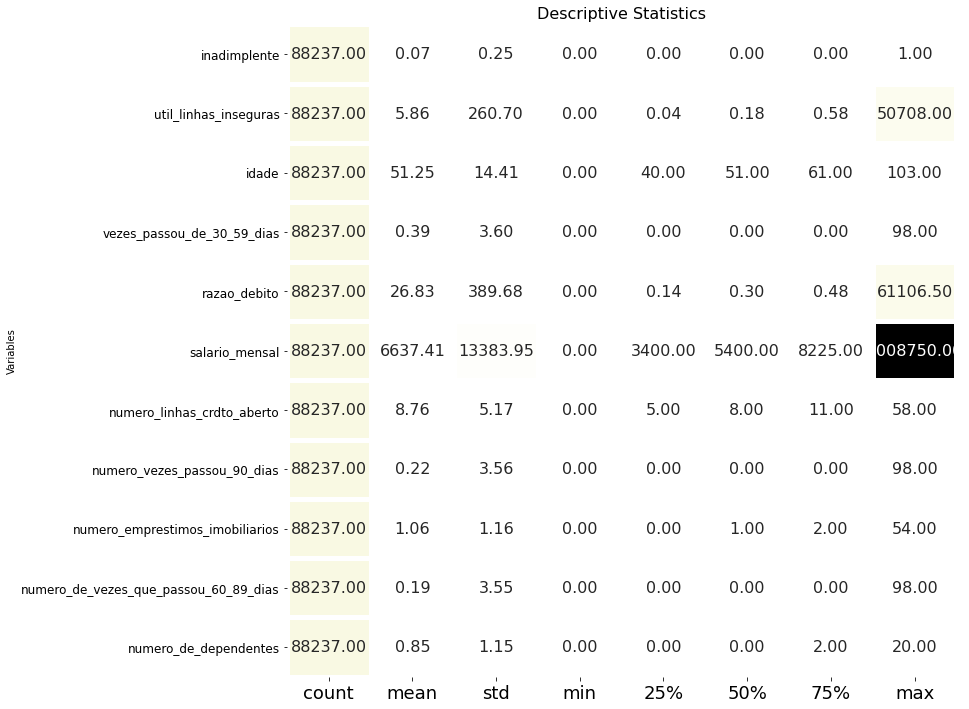

In [22]:
desc = train.describe().T

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(desc, annot=True, cmap='CMRmap_r', fmt='.02f',
            ax=ax, linewidths=5, cbar=False,
            annot_kws={'size': 16})

plt.xticks(size = 18)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("Variables")
plt.title("Descriptive Statistics", size = 16)
plt.show()

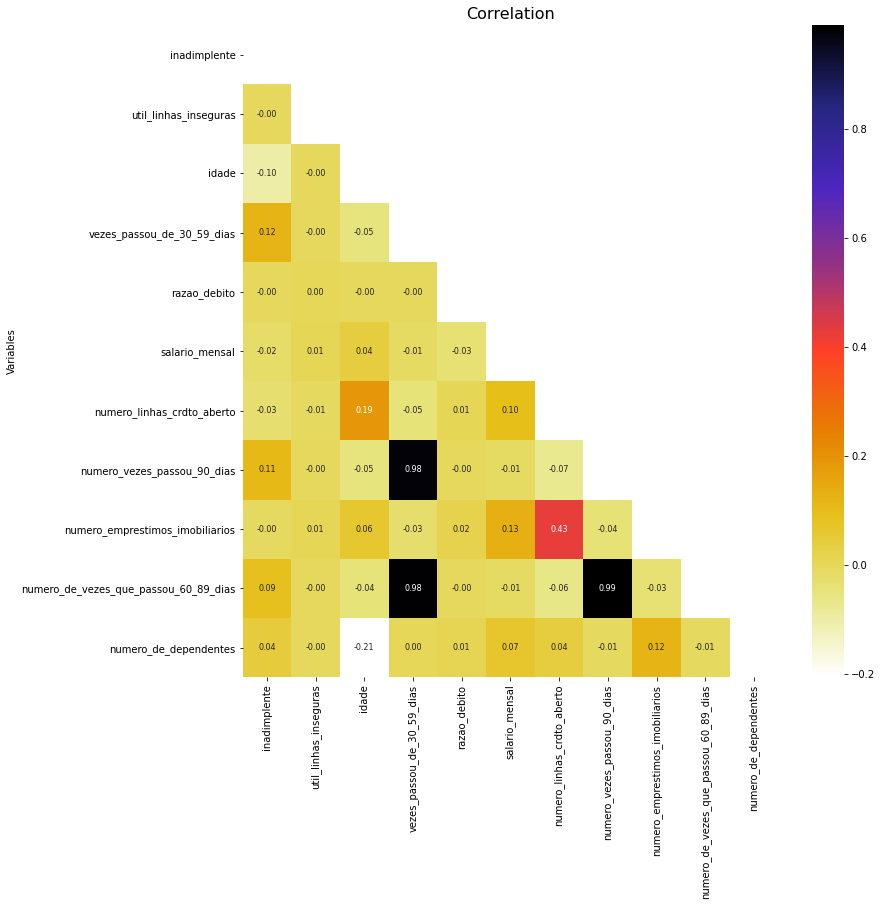

In [23]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(corr, annot=True, cmap='CMRmap_r', mask=mask, fmt='.02f', ax=ax, annot_kws={'size': 8})
plt.ylabel("Variables")
plt.title("Correlation", size = 16)
plt.show()

Normalmente quem atrasa por mais de 30 a 59 dias, tambem atrasa de 60 a 89 e de 90 em diante

## Data Visualization

<AxesSubplot:xlabel='inadimplente', ylabel='vezes_passou_de_30_59_dias'>

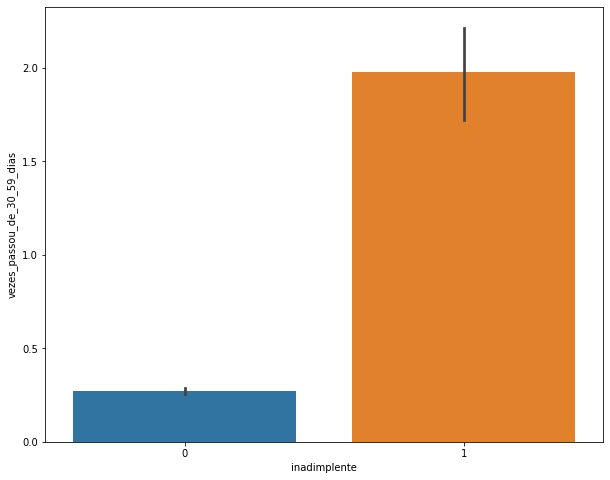

In [24]:
plt.figure(figsize=(10, 8))
sns.barplot(x='inadimplente', y='vezes_passou_de_30_59_dias', data=train)

<AxesSubplot:xlabel='vezes_passou_de_30_59_dias'>

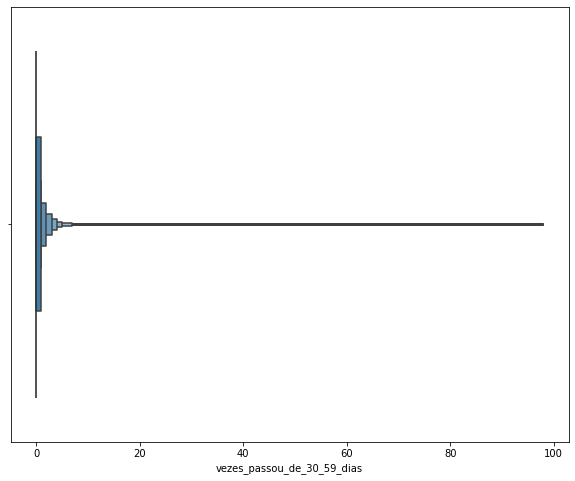

In [25]:
plt.figure(figsize=(10, 8))
sns.boxenplot(x='vezes_passou_de_30_59_dias', data=train)

In [26]:
train['vezes_passou_de_30_59_dias'].unique()

array([ 2,  0,  1,  3,  5,  4,  7, 10,  6, 98, 12,  8,  9, 96, 13])

<AxesSubplot:xlabel='numero_vezes_passou_90_dias', ylabel='salario_mensal'>

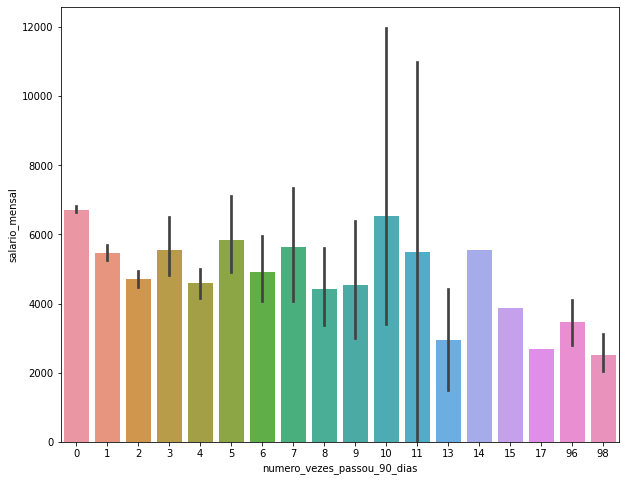

In [27]:
plt.figure(figsize=(10, 8))
sns.barplot(x='numero_vezes_passou_90_dias', y='salario_mensal', data=train)

<AxesSubplot:xlabel='inadimplente', ylabel='salario_mensal'>

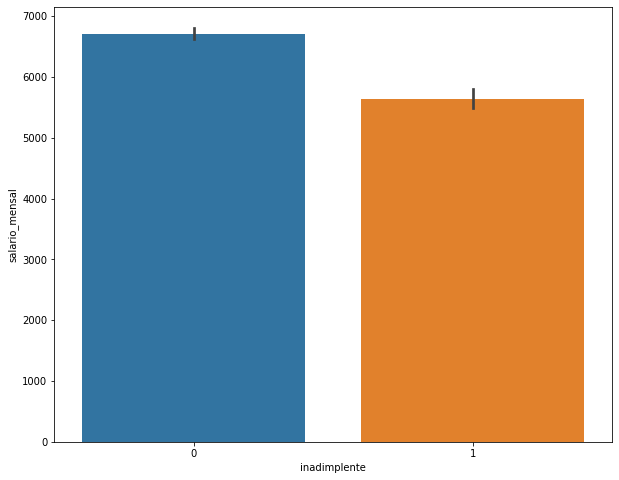

In [28]:
plt.figure(figsize=(10, 8))
sns.barplot(x='inadimplente', y='salario_mensal', data=train)

<AxesSubplot:xlabel='vezes_passou_de_30_59_dias', ylabel='numero_vezes_passou_90_dias'>

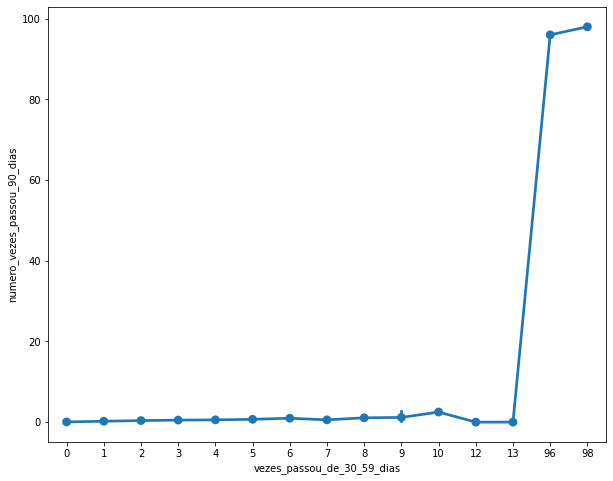

In [29]:
plt.figure(figsize=(10, 8))
sns.pointplot(x='vezes_passou_de_30_59_dias', y='numero_vezes_passou_90_dias',data=train)

### Splitting of Test and Train Data

In [30]:
# train = pd.read_csv('archive/treino.csv')

In [31]:
train.columns

Index(['inadimplente', 'util_linhas_inseguras', 'idade',
       'vezes_passou_de_30_59_dias', 'razao_debito', 'salario_mensal',
       'numero_linhas_crdto_aberto', 'numero_vezes_passou_90_dias',
       'numero_emprestimos_imobiliarios',
       'numero_de_vezes_que_passou_60_89_dias', 'numero_de_dependentes'],
      dtype='object')

In [5]:
X = train.drop('inadimplente', axis=1)
y = train.iloc[:, 0:1]

In [6]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [7]:
y_resampled['inadimplente'].count()

144972

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Creating and Training Model

## 1) Random Forest Regressor

In [37]:
rfr = RandomForestRegressor().fit(X_train, y_train)

<ipython-input-37-84338edde7a9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr = RandomForestRegressor().fit(X_train, y_train)


In [38]:
rfr.score(X_test, y_test)

0.7392435874924042

## 2) Random Forest

In [9]:
clf = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)
clf.score(X_test, y_test)

<ipython-input-9-855b377ad546>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier(n_estimators=5).fit(X_train, y_train)


0.8869022983748586

In [10]:
rf_pred = clf.predict(X_test)
rf_pred

array([0, 0, 0, ..., 1, 0, 0])

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     18101
           1       0.89      0.89      0.89     18142

    accuracy                           0.89     36243
   macro avg       0.89      0.89      0.89     36243
weighted avg       0.89      0.89      0.89     36243



<AxesSubplot:>

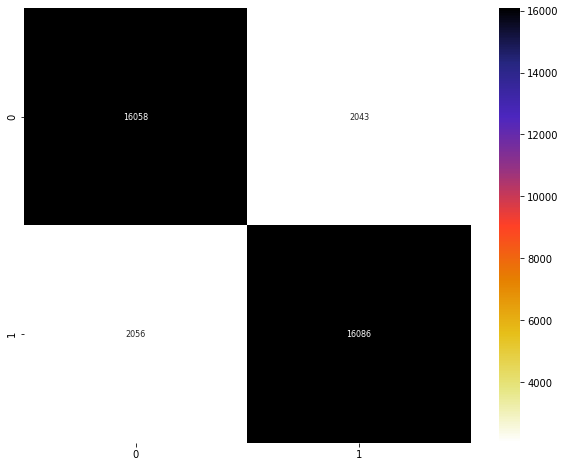

In [13]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='CMRmap_r', fmt='.0f', annot_kws={'size': 8})

## 3) KNN

In [45]:
knn = KNeighborsClassifier().fit(X_train, y_train)

/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [46]:
knn.score(X_test, y_test)

0.8354797088394965

## 4) XGB

In [17]:
xgb = XGBClassifier().fit(X_train, y_train)

/home/maksonvinicio/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
[16:55:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
xgb.score(X_test, y_test)

0.8889992550285573

## 4) Gradient Boosting Classifier

In [15]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)

/home/maksonvinicio/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [16]:
gbc.score(X_test, y_test)

0.8624837899732362